# Day 1


## Warm up

/Users/danramirez/MBS


([<matplotlib.axis.YTick at 0x17f216810>,
 [Text(0, 0, 'Andorra'),
  Text(0, 1, 'Austria'),
  Text(0, 2, 'Belgium'),
  Text(0, 3, 'Denmark'),
  Text(0, 4, 'Finland'),
  Text(0, 5, 'France'),
  Text(0, 6, 'Germany'),
  Text(0, 7, 'Italy'),
  Text(0, 8, 'Ireland'),
  Text(0, 9, 'Greece')])

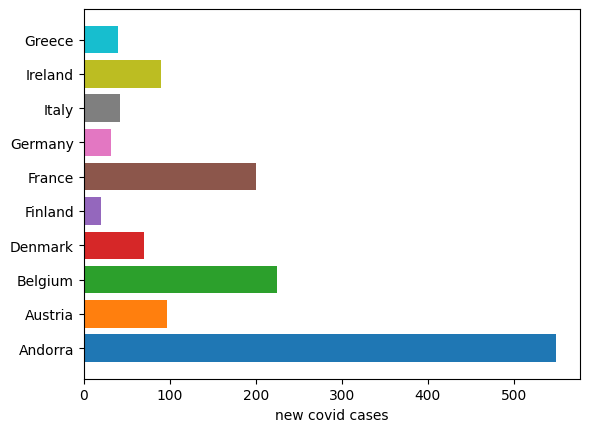

In [4]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/covid02", "covid.xlsx")
df = pd.read_excel(file,index_col='date')

x=np.arange(0,df.loc['2020-10-01'].shape[0])
y=df.loc['2020-10-01',:].values
colormap=plt.cm.tab10(x)
plt.barh(x,y,align='center',color=colormap)
plt.xlabel('new covid cases')
plt.yticks(x,df.columns)
#plt.xticks(x,df.columns,rotation=90)



# Trading Signal coding

## Part 1— testing out Yahoo Finance package

In [5]:
import yfinance as yf
import datetime

# Define the ticker symbol
tickerSymbol = 'NFLX'
yrs= 1

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

end_date = datetime.date.today()  # Today's date
start_date = end_date - datetime.timedelta(days=yrs*365) 

# Get the historical prices for this ticker
df = tickerData.history(period='1d', start=start_date, end=end_date) 

print(df)


                                 Open        High         Low       Close  \
Date                                                                        
2023-02-28 00:00:00-05:00  323.700012  327.619995  321.170013  322.130005   
2023-03-01 00:00:00-05:00  321.549988  326.600006  312.359985  313.480011   
2023-03-02 00:00:00-05:00  310.959991  315.570007  310.380005  311.880005   
2023-03-03 00:00:00-05:00  315.450012  317.489990  310.820007  315.179993   
2023-03-06 00:00:00-05:00  317.000000  323.299988  311.839996  312.029999   
...                               ...         ...         ...         ...   
2024-02-21 00:00:00-05:00  573.510010  575.780029  567.320007  573.349976   
2024-02-22 00:00:00-05:00  582.750000  590.849976  578.890015  588.469971   
2024-02-23 00:00:00-05:00  586.400024  592.429993  579.820007  583.559998   
2024-02-26 00:00:00-05:00  583.559998  590.750000  583.270020  587.650024   
2024-02-27 00:00:00-05:00  595.000000  605.359985  592.330017  601.669983   

## Part 2— Buying & Selling Singals Function

In [6]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import warnings
warnings.filterwarnings('ignore')

#setting long and short paramaters----------------------------------------
short, long= 5 ,20

# Paths and directory-----------------------------------------------------
current_directory = os.getcwd()
print(current_directory)

df['close_short']=df['Close'].rolling(window=short).mean()
df['close_long']=df['Close'].rolling(window=long).mean()
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime('%Y-%m-%d')

x5=df['close_short']
x20=df['close_long']
close=df['Close']

# Buy/Sell function-------------------------------------------------------
def buysellfx(df):
    status = 0
    pricebuy = []
    pricesell = []
    profit = []
    transdays = []
    temp_buyprice = []
    temp_buyindex = []

    for i in range(len(df) - 1):
        #buy logic
        if df['close_short'][i] > df['close_long'][i]:
            if status != 1:
                status = 1
                pricebuy.append(df['Open'][i + 1])
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
                temp_buyprice.append(df['Open'][i + 1])
                temp_buyindex.append(i + 1)
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        
        #sell logic
        elif df['close_short'][i] < df['close_long'][i]:
            if status != 0:
                status = 0
                pricebuy.append(np.nan)
                pricesell.append(df['Open'][i + 1])
                profit.append(df['Open'][i + 1] - temp_buyprice[-1])
                transdays.append(i + 1 - temp_buyindex[-1])
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        else:
            pricebuy.append(np.nan)
            pricesell.append(np.nan)
            profit.append(np.nan)
            transdays.append(np.nan)

    pricebuy.append(np.nan)
    pricesell.append(np.nan)
    profit.append(np.nan)
    transdays.append(np.nan)

    return pricebuy, pricesell, profit, transdays

# Adding new columns------------------------------------------------------
df['pricebuy'], df['pricesell'], df['profit'], df['transdays'] = buysellfx(df)
# ------------------------------------------------------------------------


/Users/danramirez/MBS


## Part 3— Charting Singals

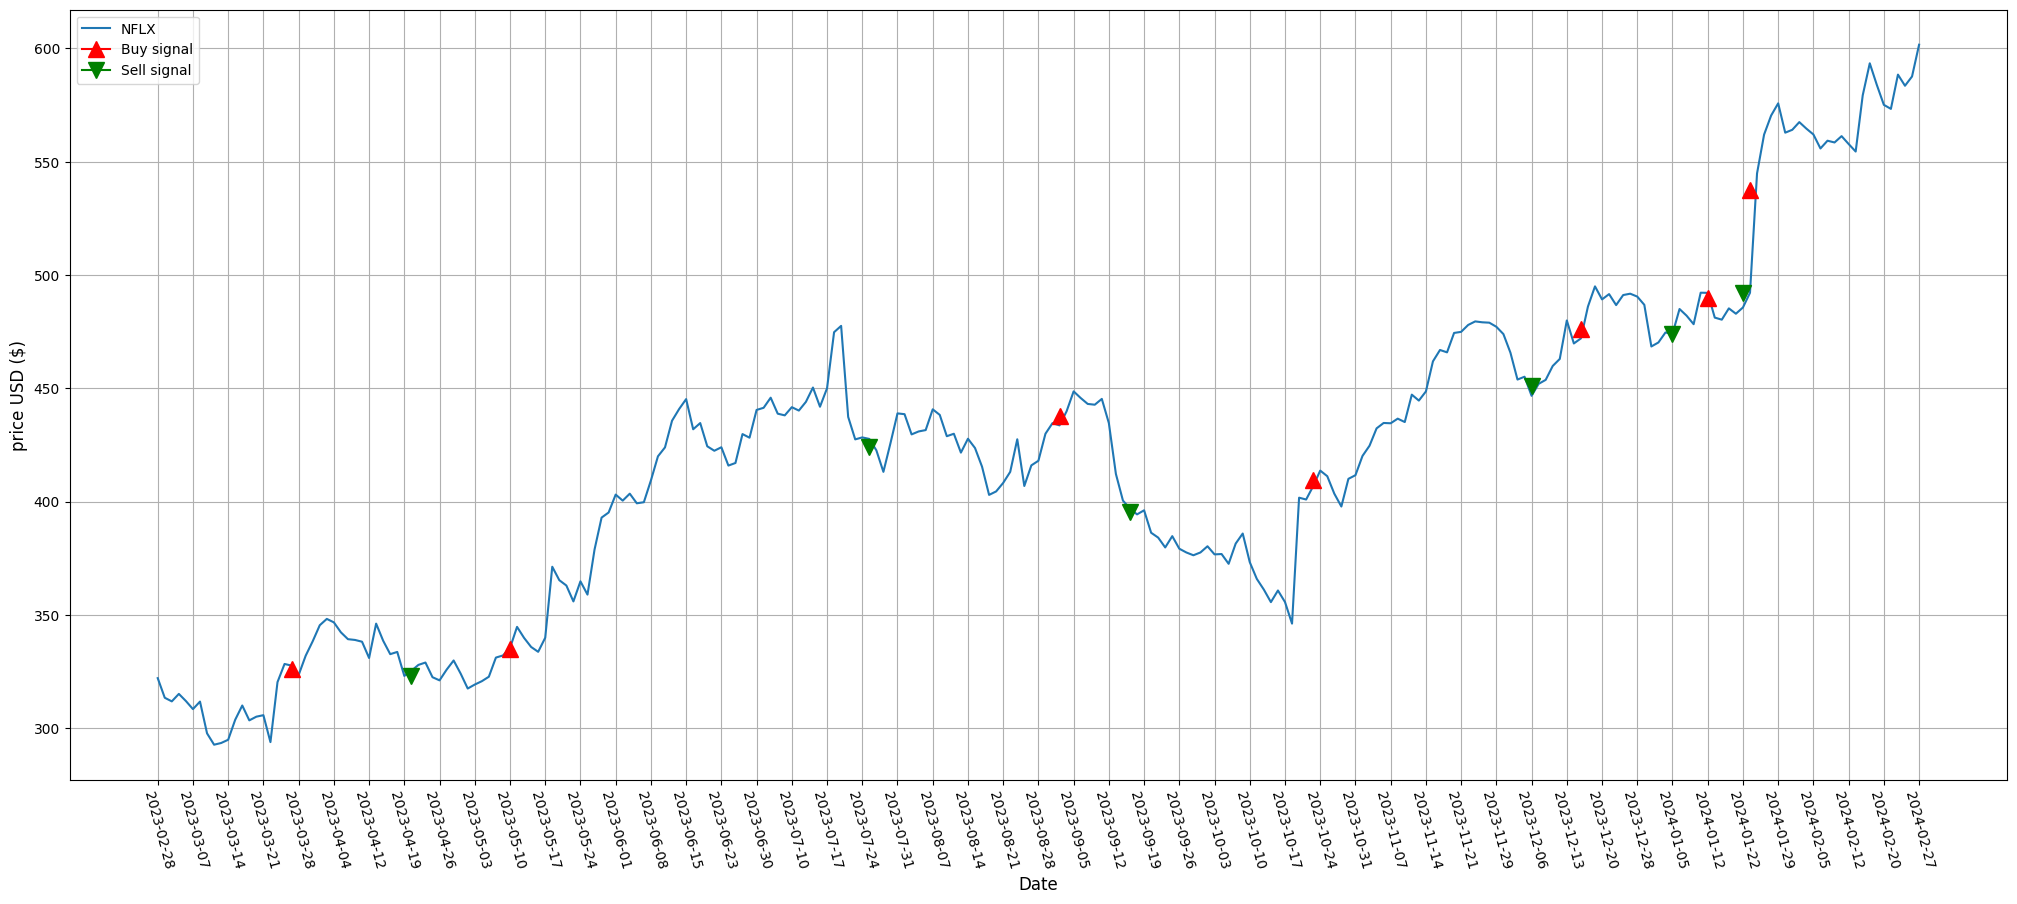

In [7]:
#charting data ------------------------------------------------------------
plt.figure(figsize=(25, 10))
plt.plot(close, label=tickerSymbol)
#plt.plot(x5, label='Close short')
#plt.plot(x20, label='Close long')

plt.plot(df.index,df['pricebuy'].values,color='red',label='Buy signal',marker='^',markersize=12)
plt.plot(df.index,df['pricesell'].values,color='green',label='Sell signal',marker='v',markersize=12)

n = 5  # Adjust n as per your data
plt.xticks(ticks=df.index[::n], labels=df.index[::n])
plt.xticks(rotation=-75)

plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('price USD ($)',fontsize=12)
plt.grid()

## Part 4— Export results to Excel

In [8]:
#export to excel-------------------------------------------------------------
df.to_excel(current_directory+'/02-output/stock.xlsx', index=True)

# Day 2

## marketing data

In [9]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Importing numpy
from sklearn.model_selection import train_test_split


# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/marketingdata", "Marketing.xlsx")
df = pd.read_excel(file)

print(df.info)

Y = df['Sales']
X_cols = ['TV','FB','Flyer']  # List of column names for predictor variables

# Extract columns from df to create X DataFrame
X = df[X_cols]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Get model summary
print(model.summary())

'''
Income	Limit	Rating	Cards	Age	Education	Gender	Student	Married

'''



/Users/danramirez/MBS
<bound method DataFrame.info of      sales_id market_name     TV    FB  Flyer  Sales
0           1   Aldi Sude  292.9  28.3   43.2   21.4
1           2       Lidl   112.9  17.4   38.6   11.9
2           3    Kaufland   97.2   1.5   30.0    9.6
3           4         Mix  265.6  20.0    0.3   17.4
4           5   Aldi Sude   95.7   1.4    7.4    9.5
..        ...         ...    ...   ...    ...    ...
195       196       Penny  262.9   3.5   19.5   12.0
196       197       Netto  142.9  29.3   12.6   15.0
197       198       Penny  240.1  16.7   22.9   15.9
198       199       Edeka  248.8  27.1   22.9   18.9
199       200       Netto   70.6  16.0   40.8   10.5

[200 rows x 6 columns]>
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statis

'\nIncome\tLimit\tRating\tCards\tAge\tEducation\tGender\tStudent\tMarried\n\n'

## Credit data

In [10]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import statsmodels.api as sm

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/credit", "credit.xlsx")
df = pd.read_excel(file)

print(df.info())

# Define your target variable
Y = df['Balance']

# Handle categorical variables using one-hot encoding
categorical_cols = ['Gender', 'Student', 'Married', 'Education']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert boolean dummies to int
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

print(df.info())

# Drop the target variable from the DataFrame to get the predictor variables
X = df.drop('Balance', axis=1)

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the model with the training data
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())


/Users/danramirez/MBS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Income        400 non-null    float64
 1   Limit         400 non-null    int64  
 2   Rating        400 non-null    int64  
 3   

# Day 3

## ML auto regressor

In [11]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy.random import randn


# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/ML_auto", "auto_regressor.xlsx")
df = pd.read_excel(file, usecols=['monthly_1000s'])  

s=preprocessing.MinMaxScaler()
scaled=s.fit_transform(df)
df_scaled=pd.DataFrame(scaled,columns=['norm'])

df_scaled['norm_prev01']=df_scaled['norm'].shift(1)
df_scaled['norm_prev02']=df_scaled['norm'].shift(2)
df_scaled['norm_prev03']=df_scaled['norm'].shift(3)
df_scaled['norm_target']=df_scaled['norm'].shift(-1)

df_scaled=df_scaled.dropna()
df_scaled=df_scaled.reset_index(drop=True)

df_scaled

#-----------------------------------------------

train_ratio=0.7
total_x,total_y=[],[]

for i in range(df_scaled.shape[0]):
    total_x.append(np.array(df_scaled.loc[i,['norm','norm_prev01','norm_prev02','norm_prev03']].values))
    total_y.append(df_scaled.loc[i,'norm_target'])
total_x=np.array(total_x)
total_y=np.array(total_y)

print('The number of Total_x:',total_x.shape[0])
print('The number of Total_y:',total_y.shape[0])


#-----------------------------------------------

train_x,Test_x,train_y,test_y = train_test_split(total_x,total_y,train_size= train_ratio)
print('The number of train_x:',train_x.shape[0])
print('The number of test_y:',test_y.shape[0])

def training(sample_x, sample_y, num_neuron, learning_rate = 1e-4, epoch= 5000):
    num_sample, in_dim = sample_x.shape[0], sample_x.shape[1]
    out_dim = sample_y.shape[1]
    ### --- the initial values of w1, b1, wo, bo are randomly decided by randn  ---###
    w1 = randn(in_dim, num_neuron)
    b1 = randn(1, num_neuron)
    wo = randn(num_neuron, out_dim)
    bo = randn(1, out_dim)
    for i in range(epoch):
        # sigmoid and feed_forward : 
        s = 1/(1+np.exp(-( sample_x.dot(w1) + b1 )))
        y_pred = s.dot(wo) + bo
        loss = np.square(y_pred - sample_y).sum()
        if np.mod(i, 100)==0:  
            print('training step: {}, loss={}'.format(i , loss))
        # back-propagation: 
        grad_y_pred = 2.0*(y_pred - sample_y)
        grad_wo = s.transpose().dot(grad_y_pred)
        grad_bo = grad_y_pred.sum()
        grad_s = grad_y_pred.dot(wo.transpose())
        grad_w1 = sample_x.transpose().dot(grad_s * s * (1-s))
        grad_b1 = np.sum(grad_s * s * (1-s), axis = 0)
        # update the parameters:
        w1 = w1-learning_rate * grad_w1
        wo = wo-learning_rate * grad_wo
        b1 = b1-learning_rate * grad_b1
        bo = bo-learning_rate * grad_bo
    return w1, wo, b1, bo
 

 
def forecasting(test_x, test_y, w1, wo, b1, bo):
    # based on the parameters, using feed-forward to forecast:
    s = 1/(1+np.exp(-( test_x.dot(w1) + b1)))
    y_pred = s.dot(wo) + bo
    rmse = np.square(y_pred - test_y).sum()


#-----------------------------------------------
def forecasting(test_x,test_y,w1,wo,b1,bo):
    s=1/(1+np.exp(-(test_x.dot(w1)+b1)))
    y_pred=s.dot(wo) + bo
    rmse=np.spuare(y_pred -test_y).sum()
    print( y_pred)
    print(rmse)

    
    return y_pred, rmse


### --- the parameters for the ANN: --- ###
in_dim, out_dim, num_neuron = train_x.shape[1], 1, 100
 
### --- training: --- ###
w_hid, w_out, b_hid, b_out = training(train_x, train_y, num_neuron)
 
### --- training: --- ###
prdt_norm_y, rmse = forecasting(test_x, test_y, w_hid, w_out, b_hid, b_out)
 
 

 
plt.plot(prdt_norm_y, )
plt.plot(test_y)
plt.legend(["prdt", "norm_y"], loc ="lower right")
plt.show()



/Users/danramirez/MBS
The number of Total_x: 140
The number of Total_y: 140
The number of train_x: 98
The number of test_y: 42


IndexError: tuple index out of range

# Day 4


# Day 5

/Users/danramirez/MBS
Model Accuracy: 95.66%


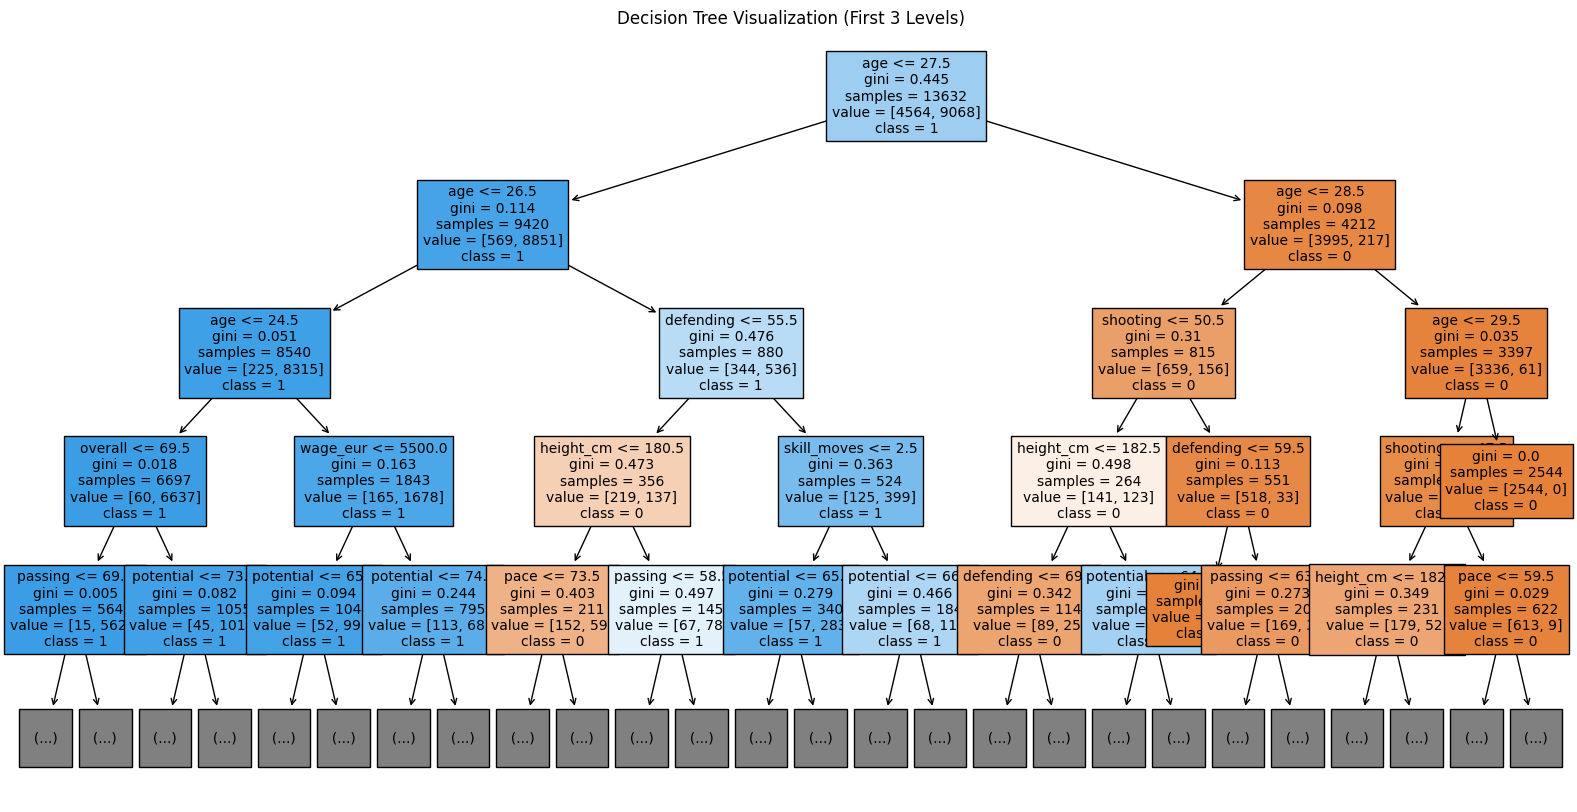

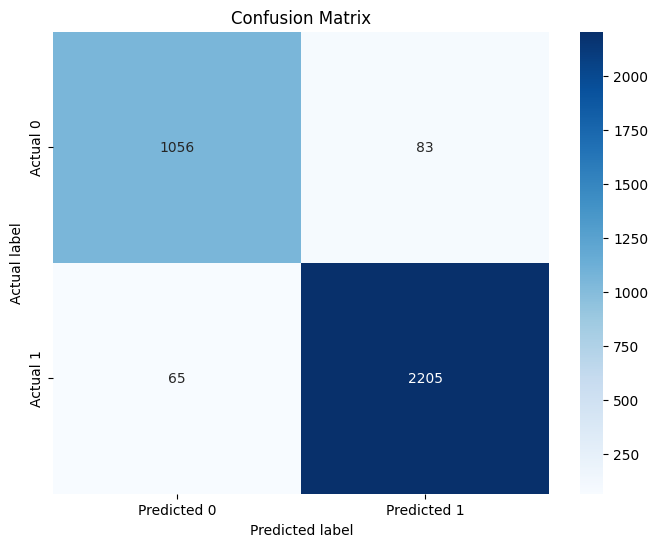

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1139
           1       0.96      0.97      0.97      2270

    accuracy                           0.96      3409
   macro avg       0.95      0.95      0.95      3409
weighted avg       0.96      0.96      0.96      3409



In [4]:
import os,sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/DT_FIFA", "DecisionTree_FIFA.xlsx")
df = pd.read_excel(file)

# Load the dataset

# Selecting features and the target variable
# Note: Adjust the feature selection as per your analysis and requirements
X = df.drop(['sofifa_id', 'short_name', 'target', 'value_in_thousand_euro', 'wage_in_thousand_euro'], axis=1)
y = df['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred = dt_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

#--------------------------------DT steps
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_model is your trained Decision Tree model and X.columns contains the feature names

# Plotting the decision tree
plt.figure(figsize=(20,10))
# Customize the following parameters as needed
plot_tree(dt_model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['0', '1'], 
          max_depth=4,  # Limits the depth of the tree to make it readable
          fontsize=10)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()


#----------confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred are defined from the previous model prediction steps

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report for detailed statistics
report = classification_report(y_test, y_pred)
print(report)
